# **Processamento de Imagens e Imagens**
Engenharia da Computação - 2021.01

## Representação e Descrição

### Download das imagens de teste

### Imports

In [3]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

### Code

In [8]:
img1 = cv.imread('drive/MyDrive/Colab Notebooks/College/Signal-Image-Processing/image_dataset_publico/cao.jpg')
img1 = cv.cvtColor(img1, cv.COLOR_BGR2RGB)

In [9]:
img1 = cv.cvtColor(img1, cv.COLOR_RGB2GRAY)
th, img1 = cv.threshold(img1, 127, 255, cv.THRESH_BINARY_INV)

# Extrair o Esqueleto da Imagem
img2 = np.zeros(img1.shape, np.uint8)
kernel = cv.getStructuringElement(cv.MORPH_CROSS, (3,3))

fim = False
img3 = img1.copy()
while (not fim):
    erosao = cv.erode(img3, kernel)
    dilatacao = cv.dilate(erosao, kernel)
    temp = cv.subtract(img3, dilatacao)
    img2 = cv.bitwise_or(img2, temp)
    img3 = erosao.copy()

    zeros = np.size(img3) - cv.countNonZero(img3)
    if (zeros == np.size(img3)):
        fim = True

_, img2 = cv.threshold(img2, 10, 255, cv.THRESH_BINARY_INV)
_ = cv.add(img1, img2)

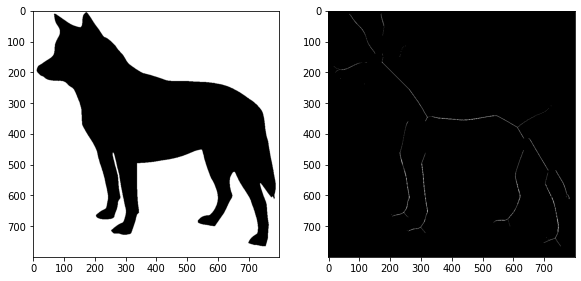

In [10]:
plt.figure(figsize=(15, 10))
plt.subplot(131), plt.imshow(img1, cmap='binary'),
plt.subplot(132), plt.imshow(img2, cmap='binary'),
plt.show()

In [15]:
img1 = cv.imread('drive/MyDrive/Colab Notebooks/College/Signal-Image-Processing/image_dataset_publico/cao.jpg')
img1 = cv.cvtColor(img1, cv.COLOR_BGR2RGB)

In [16]:
img1 = cv.cvtColor(img1, cv.COLOR_RGB2GRAY)
th, img1 = cv.threshold(img1,127, 255, cv.THRESH_BINARY_INV)

# Descritores de Borda
# Perímetro
contorno, ordem = cv.findContours(img1, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

perimetro = cv.arcLength(contorno[0], True)
print(f'Perímetro: {int(perimetro)}')

img2 = cv.Canny(img1, 50, 100)
perimetro = cv.countNonZero(img2)
print(f'Perímetro: {int(perimetro)}')

# Diâmetro
diametro = np.sqrt(4 * cv.contourArea(contorno[0]) / np.pi)
print(f'Diâmetro: {int(diametro)}')

Perímetro: 4389
Perímetro: 4236
Diâmetro: 549


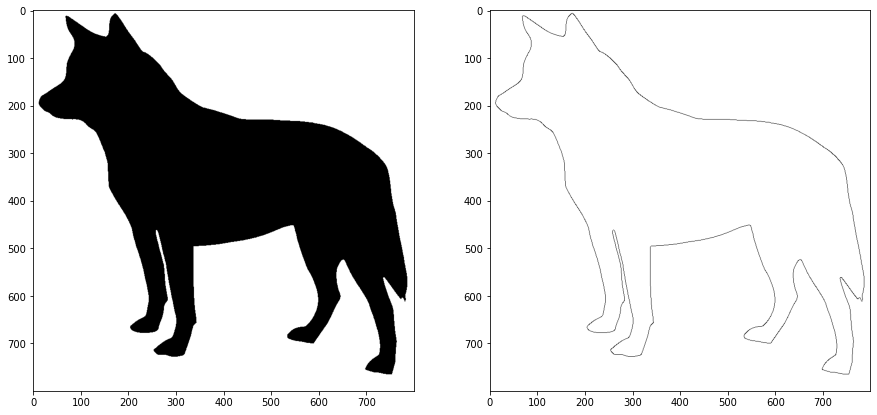

In [17]:
plt.figure(figsize=(15, 10))
plt.subplot(121), plt.imshow(img1, cmap='binary'),
plt.subplot(122), plt.imshow(img2, cmap='binary'),
plt.show()

In [18]:
img1 = cv.imread('drive/MyDrive/Colab Notebooks/College/Signal-Image-Processing/image_dataset_publico/cao.jpg')
img1 = cv.cvtColor(img1, cv.COLOR_BGR2RGB)

In [19]:
img1 = cv.cvtColor(img1, cv.COLOR_RGB2GRAY)
th, img1 = cv.threshold(img1, 127, 255, cv.THRESH_BINARY_INV)

# Descritores de Região
# Área
area = cv.countNonZero(img1)
print(f'Área = {area}')

# Compacidade
perimetro = cv.countNonZero(cv.Canny(img1, 50, 100))
compacidade = np.square(perimetro) / area
print(f'Compacidade = {compacidade:.4f}')

# Projeções
lin, col = img1.shape

# Projeção Vertical
proj_vert = []
for i in range(0, col):
    proj_vert.append(cv.countNonZero(img1[:, i]))

# Projeção Horizontal
proj_horiz = []
for i in range(0, lin):
    proj_horiz.append(cv.countNonZero(img1[i ,:]))

Área = 239231
Compacidade = 75.0057


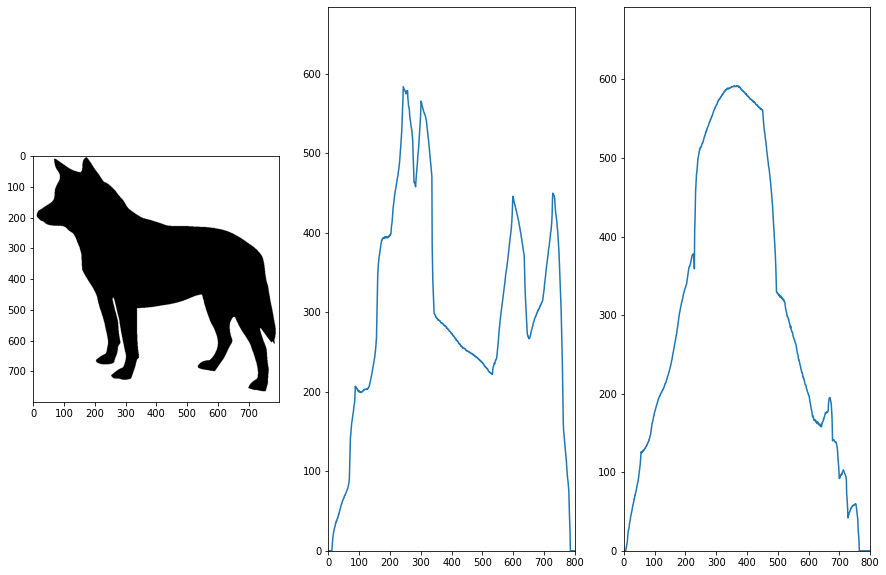

In [20]:
plt.figure(figsize=(15,10))
plt.subplot(131), plt.imshow(img1, cmap='binary'),
plt.subplot(132), plt.plot(range(0, col), proj_vert, '-'), plt.xlim([0, col]), plt.ylim([0, np.max(proj_vert) + 100])
plt.subplot(133), plt.plot(range(0, lin), proj_horiz, '-'), plt.xlim([0, lin]), plt.ylim([0, np.max(proj_horiz) + 100])
plt.show()

### Exercises

#### Imports

#### Code